<a href="https://colab.research.google.com/github/DSA-Kurs11-2021/python-intro/blob/main/python-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Einführung in Python

Diese Einführung is angepasst vom CS231n Kurs in Stanford.

This tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for cs231n. It was adapted as a Jupyter notebook for cs228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335).

This version has been adapted for Colab by Kevin Zakka for the Spring 2020 edition of [cs231n](https://cs231n.github.io/). It runs Python3 by default.

##Einführung

Python ist eine universell einsetzbare Programmiersprache, die mit der Verwendung von einigen Bibliotheken (numpy, scipy, matploblib) zu einer wertvollen Umgebung für wissenschaftliche Programmierung wird.

Diese Einführung dient dazu euch grundlegende Pythonkenntnisse beizubringen, damit wir während des Kurses uns auf die Aspekte der KI fokussieren können. Für diejenigen unter euch, die entweder keine Programmiererfahrung haben oder mehr Interesse an anderen Aspekten der KI haben werden wir aber auch andere Möglichkeiten anbieten eure eigenen KI-Systeme zu entwickeln.

Insofern ist diese Einführung und programmieren während des Kurses völlig optional.

Diese Einführung behandelt:

* Basic Python: Grundlegende Datentypen (Containers, Lists, Dictionaries, Sets, Tuples), Funktionen, Klassen
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Bilder
* IPython: Erstellen von notebooks, Generelle Anwendungen

## Ein Kommentar zu Pythonversionen & Colab

Seit Januar 2020 wird Python2 nicht mehr unterstützt. Insofern werden alle unsere Materialien Python3 verwenden.

Für diejenigen unter euch die keinen Googleaccount haben oder erstellen wollen empfehlen wir Jupyter Notebooks mit Anaconda zu verwenden:
- https://www.anaconda.com/products/individual
- Mehr infos auch unter: https://cs231n.github.io/python-numpy-tutorial/#jupyter-and-colab-notebooks

Ihr könnt einzelne Zellen mit dem "Run"-Button (Button mit Pfeil am linken oberen Rand der Zelle) oder per "shift"+"Enter" ausführen.
Ausserdem sind Codeblöcke mit `# ...` Kommentare die nicht ausgeführt werden.

##Pythongrundlagen

Python ist eine höhere Programmiersprache mit dynamischen Typen. Pythoncode wird oftmals fast als `pseudocode` bezeichnet, da man sehr komplizierte Ideen mit sehr wenigen Zeilen Code ausdrücken kann und dabei sehr lesbar ist.

Zum Beispiel ist dies eine Implementierung des klassischen Quicksort-Algorithmus:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


###Grundlegende Datentypen

####Numbers

Zahlen werden durch integers (ganze Zahlen) oder floats (reelle Zahlen) ausgedrückt. Integers und floats funktionieren wie in anderen Programmiersprachen:

In [2]:
x = 3
print(x, type(x))

3 <class 'int'>


In [3]:
print(x + 1)   # Addition
print(x - 1)   # Subtraktion
print(x * 2)   # Multiplikation
print(x ** 2)  # Exponentiation

4
2
6
9


In [4]:
x += 1
print(x)
x *= 2
print(x)

4
8


In [5]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


Im Vergleich zu anderen Programmiersprachen hat Python keine Operatoren zum inkrementieren (x++) oder dekrementieren (x--).

Python hat auch eingebaute Typen für größere ganze Zahlen (long integers) und komplexe Zahlen; Ihr könnt die Details in der [Dokumentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-long-complex) finden.

####Booleans

Python implementiert alle üblichen Operatoren für Boolean Logik, aber benutzt dafür Englische Wörter anstatt Symbole (`&&`, `||`, etc.):

In [6]:
t, f = True, False
print(type(t))

<class 'bool'>


Und die Operatoren:

In [7]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


####Strings (Zeichenketten)

In [8]:
hello = 'hello'   # String koennen einzelne oder
world = "world"   # doppelte Anfuehrungszeichen benutzen.
print(hello, len(hello))

hello 5


In [9]:
hw = hello + ' ' + world  # Strings zusammenfuegen
print(hw)

hello world


In [10]:
hw12 = '{} {} {}'.format(hello, world, 12)  # Formatierung von Strings
print(hw12)

hello world 12


String-Objekte haben einige Funktionen, z.B.:

In [11]:
s = "hello"
print(s.capitalize())  # Kapitalisieren vom String
print(s.upper())       # Konvertieren des Strings in "uppercase"; schreibt "HELLO"
print(s.rjust(7))      # Rechts-ausrichten des Strings, fuegt Leerzeichen ein.
print(s.center(7))     # Mittel-ausrichten des Strings, fuegt Leerzeichen ein.
print(s.replace('l', '(ell)'))  # Ersetzt alle Instanzen eines Teilstrings mit einem anderem
print('  world '.strip())  # Entfernt alle Leerzeichen (und Whitespaces, e.g. Tab, etc) am Anfang und Ende

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


Ihr könnt mehr Methoden in der [Dokumentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods) finden.

###Containers

Python enthält einige Container-Typen: lists, dictionaries, sets, and tuples.

####Lists

Eine Liste (list) ist die Pythonversion eines "Arrays". Eine Liste enthält eine beliebige Anzahl an Elementen verschiedener Typen und kann die Größe verändern:

In [12]:
xs = [3, 1, 2]   # Erstellt eine Liste mit Elemten 3, 1, 2
print(xs, xs[2])
print(xs[-1])     # Negative Indizes zaehlen vom Ende der Liste; schreibt "2"

[3, 1, 2] 2
2


In [13]:
xs[2] = 'foo'    # Listen koennen verschiedene Typen enthalten.
print(xs)

[3, 1, 'foo']


In [14]:
xs.append('bar') # Fuegt ein neues Element am Ende der Liste hinzu.
print(xs)  

[3, 1, 'foo', 'bar']


In [15]:
x = xs.pop()     # Entfernt das letzte Element der Liste und gibt es zurueck.
print(x, xs)

bar [3, 1, 'foo']


Mehr details findet ihr in der [Dokumentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

####Slicing - Zugang zu Listenelementen

Abgesehen davon immer nur auf ein einziges Listenelement zuzugreifen, kann Python auch auf Teillisten zugreifen. Das wird als "slicing" bezeichnet:

In [16]:
nums = list(range(5))    # "range" ist eine eingebaute Funktion die Listen mit ganzen Zahlen (integers) erstellt
print(nums)         # Schreibt "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Hole ein Stueck (slice) von Index 2 bis 4 (exklusive); schreibt "[2, 3]"
print(nums[2:])     # Hole ein slice von Index 2 bis zum Ende; schreibt "[2, 3, 4]"
print(nums[:2])     # Hole ein slice vom Anfange bis Index 2 (exklusive); schreibt "[0, 1]"
print(nums[:])      # Hole ein slice der ganzen Liste; schreibt ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice Indizes koennen negativ sein; schreibt ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Ueberschreibe ein slice mit einer neuen Liste (muss gleich gross sein)
print(nums)         # schreibt "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


####Loops - Schleifen

So kann man durch alle Elemente einer Liste iterieren:

In [17]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


Falls ihr auch den Index zum Element haben wollt könnt ihr "enumerate" benutzen:

In [18]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


####List comprehensions - Erstellen von Listen mit kürzeren Codebausteinen:

Wenn man programmiert möchte man oft einen Art von Daten in eine andere Form umwandeln. Zum Beispiel berechnet dieser Code das Quadrat der Zahlen in einer Liste:

In [19]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


Das kann mit sognennaten "list comprehensions" kürzer ausgedrückt werden. List comprehensions bauen neue Listen indem sie über jedes Element iterieren:

In [20]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions können auf Bedingungen ("if x % 2 ==0" -- Falls X teilbar durch 2 ist) enthalten:

In [21]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


####Dictionaries - Zuordnungstabelle

Eine Zuordnungstabelle (dictionary) speichert (Schlüssel (key), Wert (value)) Paare, ähnlich zu einer `Map` in Java oder einem object in Javascript. Ihr könnt es so verwenden:

In [22]:
d = {'cat': 'cute', 'dog': 'furry'}  # Erstelle ein neues new dictionary mit Daten
print(d['cat'])       # Zugriff auf einen Eintrag; schreibt "cute"
print('cat' in d)     # Schaue ob der Schluessel "cat" ist im dictionary; schreibt "True"

cute
True


In [23]:
d['fish'] = 'wet'    # Setze einen Eintrag im dictionary
print(d['fish'])      # Schreibt "wet"

wet


In [24]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d
# Dies wirft einen Fehler da der Schluessel "monkey" nicht im dictionary
# enthalten ist.

KeyError: ignored

In [25]:
print(d.get('monkey', 'N/A'))  # Zugriff auf ein Element mit Vorgabewert; schreibt "N/A"
print(d.get('fish', 'N/A'))    # Zugriff auf ein Element mit Vorgabewert; schreibt "wet"

N/A
wet


In [26]:
del d['fish']        # Entfernt ein Element vom dictionary
print(d.get('fish', 'N/A')) # "fish" ist kein Schluessel mehr; schreibt "N/A"

N/A


Ihr könnt alle Informationen in der [Dokumentation](https://docs.python.org/2/library/stdtypes.html#dict) finden.

So kann man einfach über alle Schlüssel und Werte eines dictionary iterieren:

In [27]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions:  Ähnlich wie "list comprehensions" kann man dictionieres zusammenbauen, z.B.:

In [28]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


####Sets - Mengen

Eine Menge (set) ist eine ungeordnete Kollektion von einzigartigen Elementen. Hier ist ein einfaches Beispiel:

In [29]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Ueberpruefe ob ein Element in der Menge ist; schreibt "True"
print('fish' in animals)  # schreibt "False"


True
False


In [30]:
animals.add('fish')      # Fuegt ein Element zum Set hinzu.
print('fish' in animals)
print(len(animals))       # Anzahl der Elemente im Set.

True
3


In [31]:
animals.add('cat')       # Wenn man ein Element hinzufuegt, das schon im Set ist, passiert nichts.
print(len(animals))       
animals.remove('cat')    # Entferne ein Element vom Set.
print(len(animals))       

3
2


_Loops - Schleifen_: Man benutzt die gleiche Syntax wie wenn man über Listen iteriert; da Sets aber keine Reihenfolge der Elemente speichern kann man keine Annahmen über die Reihenfolge beim Iterieren machen:

In [32]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: fish


Set comprehensions: Genau wie bei Listen und dictionaries, können wir einfach Sets mit set comprehension erstellen:

In [33]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


####Tuples

Ein Tuple ist eine (unveränderbare) geordnete Liste von Werten. Ein Tuple ist ähnlich zu einer Liste; einer der größten Unterschiede ist, dass Tuples als Schlüssel in dictionaries und Werte in Sets verwendet werden können, Listen aber nicht. Hier ist ein einfaches Beispiel:

In [34]:
d = {(x, x + 1): x for x in range(10)}  # Erstelle ein dictionary mit tuple Schluesseln.
t = (5, 6)       # Erstelle ein Tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [35]:
t[0] = 1
# Das erzeugt einen Fehler - man kann Tuple nicht verändern.

TypeError: ignored

###Functions - Funktionen 

Python-Funktionen werden mit dem `def` keyword definiert. Zum Beispiel:

In [36]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


Wir werden oft Funktionen definieren die optionale Argumente benutzen: ('loud' ist optional und 'False' ist der Standardwert)

In [37]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


###Classes - Klassen

So definiert man Klassen in Python:

In [38]:
class Greeter:

    # Konstruktor
    def __init__(self, name):
        self.name = name  # Erstelle eine Instanzvariable.

    # Instanzmethode
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Erstelle eine Instanz der "Greeter"-Klasse.
g.greet()            # Rufe die Instanzmethode auf; schreibt "Hello, Fred"
g.greet(loud=True)   # Rufe die Instanzmethode auf; schreibt "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


##Numpy

Numpy ist die grundlegende Bibliothek für wissenschaftliches Arbeiten in Python.Numpy ermöglicht die Verwendung von hoch-performanten multidimensionalen arrays und Tools um mit diesen Arrays zu arbeiten.

Um Numpy zu benutzen, müssen wir zuerst das `numpy` Paket importieren:

In [39]:
import numpy as np

###Arrays

Ein Numpy-Array ist ein Raster von Werten, alle mit dem selben Typ, und kann mit einem Tuple von integers indiziert werden. Die Anzahl der Dimensionen ist der Rang (Rank) des Arrays; Die Form (shape) des Arrays is ein Tuple mit integers die die Anzahl der Elemente in dieser Dimension angeben.

Wir können ein Numpy-Array mit geschachtelten Python-Listen initialisieren und mit eckigen Klammern auf die Elemente zugreifen:

In [40]:
a = np.array([1, 2, 3])  # Erstelle ein Rang-1 Array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Aendere ein Element des Arrays
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [41]:
b = np.array([[1,2,3],[4,5,6]])   # Erstelle ein Rang-2 Array
print(b)

[[1 2 3]
 [4 5 6]]


In [42]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy bietet auch viele Funktionen um Arrays zu erstellen:

In [43]:
a = np.zeros((2,2))  # Erstelle ein Array voller Nullen.
print(a)

[[0. 0.]
 [0. 0.]]


In [44]:
b = np.ones((1,2))   # Erstelle ein Array voller Einsen
print(b)

[[1. 1.]]


In [45]:
c = np.full((2,2), 7) # Erstelle ein Array mit einer Konstante
print(c)

[[7 7]
 [7 7]]


In [46]:
d = np.eye(2)        # Erstelle eine 2x2 Einheitsmatrix
print(d)

[[1. 0.]
 [0. 1.]]


In [47]:
e = np.random.random((2,2)) # Erstelle ein 2x2 Array mit zufaelligen Werten 
print(e)

[[0.55799835 0.91537642]
 [0.22261683 0.72098233]]


###Array indexing - Zugriff auf Numpy Arrays

Numpy bietet mehrere Wege um auf Arrays zuzugreifen:

Slicing: Ähnlich wie Python-Listen, können Numpy-Arrays geslicet werden. Da Arrays eventuell mehr-dimensional sind, muss man für jede Dimension ein "slice" angeben:

In [48]:
import numpy as np

# Erstelle den folgenden Rang 2 Array mit shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Benutze slicing um ein Teilarray mit den ersten zwei Reihen
# und Spalte 1 und 2 (wir fangen bei 0 an zu zaehlen); b ist ein Array mit shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


Ein "slice" von einem Numpy Array ist eine Ansicht der gleichen Daten - wenn man die Daten vom "slice" verändert, ändert man auch das originale Array.

In [49]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] ist das gleiche Stueck von Daten, wie a[0, 1]
print(a[0, 1]) 

2
77


Man kann auch integer-Indizes mit slice-Indizes kombinieren. Damit erhält man aber ein Array mit niedrigerem Rang als der Originalarray:

In [50]:
# Erstelle den folgenden Rang-2 Array mit shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Hier gibt es verschiedene Arten um die mittlere Reihe des Arrays zu indizieren.
Wenn man Integer-Indizes mit slicing kombiniert erhält man ein Array mit niedrigerem Rang, während man mit nur slicing den gleichen Rang wie vom Originalarraz erhält:

In [51]:
row_r1 = a[1, :]    # Rang 1 Ansicht von der zweiten Reihe
row_r2 = a[1:2, :]  # Rang 2 Ansicht von der zweiten Reihe
row_r3 = a[[1], :]  # Rang 2 Ansicht von der zweiten Reihe
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [52]:
# Das gleiche gilt wenn wir Spalten indizieren:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Indizieren mit Integerarrays: Wenn man Numpyarrays mit slicing indiziert erhält man immer eine Ansicht auf ein Teilarray des Originalarrays. Andererseits kann man mit Integerarrays beliebige neue Arrays aus einem Anderen Array erstellen:

In [53]:
a = np.array([[1,2], [3, 4], [5, 6]])

# Das ist ein Beispiel , wie man mit Integerarrays indiziert.
# Das Ergebnis hat shape (3,) und
print(a[[0, 1, 2], [0, 1, 0]])

# Das obere Beispiel ist das gleiche, wie:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [54]:
# Wenn man Integerarrays fuer das indizieren benutzt, kann man Elemente
# vom Originalarray mehrmals verwenden:
print(a[[0, 0], [1, 1]])

# Das obere Beispiel ist das gleiche, wie:
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


Ein nützlicher Trick mit Integerarrayindizierung ist es eine Element pro Reihe / Spalte zu bearbeiten:

In [55]:
# Erstelle ein neues Array von dem wir Elemente auswaehlen.
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [56]:
# Erstelle ein Array mit Indizes.
b = np.array([0, 2, 0, 1])

# Waehle ein Element von jeder Reihe mit den Indizes in b.
print(a[np.arange(4), b])  # Schreibt "[ 1  6  7 11]"

[ 1  6  7 11]


In [57]:
# Bearbeite ein Element von jeder Reihe mit den Indizes in b.
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Indizierung mit Boolean Arrays: Indizierung mit Boolean Arrays kann beliebige Elemente aus einem Array auswählen. Es wird oft benutzt umd Elemente zu wählen die eine bestimmte Bedingung erfüllen:

In [58]:
a = np.array([[1,2], [3, 4], [5, 6]])

print(a)

bool_idx = (a > 2)  # Finde alle Elemente die groesser als 2 sind;
                    # das Ergebnis is ein Array mit Boolean Werten mit dem
                    # gleichen shape wie a, wo jede Zelle von bool_idx beschreibt
                    # ob das equivalente Element in a > 2 ist.

print(bool_idx)

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [59]:
# Wir benutzen Boolean Arrayindizierung um ein Rang-1 Array zu erstellen
# das die Elemente aus a enthaelt wo bool_idx True ist.
print(a[bool_idx])

# Wir koennen das gleiche in einer kuerzeren Variante schreiben:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


Wir haben einige Details von Arrayindizierung in Numpy ausgelassen, um diese Einführung nicht zu lang zu gestalten. Die Dokumentation enthält weitere Infos.

###Numpy-Datentypen

Jedes Numpy-Array ist ein Raster aus Elementen des selben Typs. Numpy enthält eine Menge numerischer Datentypen die man verwenden kann um Arrays zu erstellen. Numpy versucht automatisch zu verstehen welchen Datentyp man wählen wollte, aber bietet die Funktion an optional explizit anzugeben welcher Datentyp gewünscht ist:

In [60]:
x = np.array([1, 2])  # Das laesst numpy den Datentyp auswaehlen numpy 
y = np.array([1.0, 2.0])  # Das laesst numpy den Datentyp auswaehlen
z = np.array([1, 2], dtype=np.int64)  # Das bestimmt den Datentyp explizit

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


Die [Dokumentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) enthält alle Infos zu den Datentypen.

###Mathematik mit Arrays

Simple mathematische Funktionen operieren auf jedem Element einzeln und können mit den einfachen Operatoren (z.B. +, -, ...) oder über Numpy-Funktionen benutzt werden:

In [61]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Per-element Summierung; beide Ergebnisse sind das gleiche Array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [62]:
# Per-element Differenz; beide Ergebnisse sind das gleiche Array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [63]:
# Per-element Produkt; beide Ergebnisse sind das gleiche Array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [64]:
# Per-element Division; beide Ergebnisse sind das gleiche Array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [65]:
# Per-element Wurzel; das Ergebnis is:
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Wir benutzen die `dot` Funktion um innere Produkte von Vektoren zu berechen, um einen Vektor mit einer Matrix zu multiplizieren und um Matrizen zu multiplizieren. `dot` kann als Numpy-Funktion oder als Funktion der Arrayinstanzen aufgerufen werden:

In [66]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inneres Produkt von Vektoren; beide Ergebnisse sind 219
print(v.dot(w))
print(np.dot(v, w))

219
219


Man kann auch `@` als Operator benutzen - das is equivalent zum Numpy `dot`-Operator.

In [67]:
print(v @ w)

219


In [68]:
# Matrix / Vektor-Product; Alle Ergebnisse sind das Rang-1 Array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [69]:
# Matrix / Vektor-Product; Alle Ergebnisse sind das Rang-2 Array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy biete viele nützliche Funtionen um verschiedene Berechnungen auf Arrazs durchzuführen; eine der Nützlichsten ist `sum`:

In [70]:
x = np.array([[1,2],[3,4]])

print(x)

print(np.sum(x))  # Berechne die Summe aller Elemente; schreibt "10"
print(np.sum(x, axis=0))  # Berechne die Summe fuer jede Spalte; schreibt "[4 6]"
print(np.sum(x, axis=1))  # Berechne die Summe fuer jede Reihe; schreibt "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


Ihr könnt die volle Liste an mathematischen Funktionen in der [Dokumentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html) finden.

Abgesehen von mathematischen Funktionen, müssen wir oft die Form (shape) von den Arrays ändern oder die Daten anderweitig anpassen. Die einfachste Operation ist es eine Matrix zu transponieren, dafür benutyt man einfach die `T`-Eigenschaft eines Array-Objektes:

In [71]:
print(x)
print("transponiert\n", x.T)

[[1 2]
 [3 4]]
transponiert
 [[1 3]
 [2 4]]


In [72]:
v = np.array([[1,2,3]])
print(v )
print("transponiert\n", v.T)

[[1 2 3]]
transponiert
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting (Automatisches Erweitern von Arrays) ist ein nützlicher Mechanismus der es Numpy erlaubt Arrays mit verschiedenen shapes für arithmetische Operationen zu verwenden. Man hat oft einen kleinen und einen größeren Array und möchte den kleineren mehrfach verwenden um eine Operation auf dem größeren Array auszuführen.

Nehmen wir an, dass wir einen konstanten Vektor zu jeder Reihe einer Matrix hinzufügen wollen. Wir können das so implementieren:

In [73]:
# Wir werden den Vektor v zu jeder Reihe der Matrix x hinzufuegen und
# das Ergebnis in der Matrix y speichern:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Erstelle eine leere Matrix mit der gleichen shape wie x

# Addiere den Vektor v zu jeder Reihe der Matrix x mit einer expliziten Schleife
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Auch wenn dies funktioniert, ist dies oftmals sehr langsam wenn x groß ist, weil die explizite Schleife langsam ist. Wir können stattdessen eine Matrix `vv` erstellen indem wir `v` mehrfach aneinander setzen und diese Matrix `vv` per-element zu `x` addieren. Wir könnten dies so implementieren:

In [74]:
vv = np.tile(v, (4, 1))  # Setze 4 Kopien von v aufeinander auf
print(vv)                # schreibt "[[1 0 1]
                         #            [1 0 1]
                         #            [1 0 1]
                         #            [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [75]:
y = x + vv  # Addiere x und vv per-element
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Mit Numpy-Broadcast können wir die selbe Operation ausführen ohne explizit mehrere Kopien von `v` zu erstellen. Schauen wir uns diese Implementierung an:

In [76]:
# Wir werden den Vektor v zu jeder Reihe der Matrix x hinzufuegen und
# das Ergebnis in der Matrix y speichern:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Addiere v zu jeder Reihe von x mit Hilfe von broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Die Zeile `y = x + v` funktioniert obwohl `x` das shape `(4, 3)` hat und `v`  shape `(3,)` hat weil Broadcasting verwendet wird; Die Zeile arbeitet als würde v eigentlich shape `(4, 3)` haben, wo jede Reihe eine Kopie von `v` ist, und dann wird die Summe per-element gebildet.

Broadcasting von zwei Arrays folgt diesen Regeln:

1. Falls die Arrays nicht den gleichen Rang haben, wird dsa shape des Arrays mit kleinerem Rang mit (1,) von vorne aufgefüllt bis beide shapes die gleiche Länge / die Arrays den gleichen Rang haben.
2. Die zwei Arrays sind in einer Dimension kompatibel, falls sie die gleiche Größe in dieser Dimension haben oder einer von beiden Größe 1 in dieser Dimension hat.
3. Die Arrays können gebroadcasted werden, falls alle Dimensionen kompatibel sind.
4. Nach dem Broadcasting verhält sich jedes Array so als hätte es ein shape das gleich dem per-Element Maximum der shapes beider Arrays ist.
5. In jeder Dimension, in der ein Array Größe 1 hat und der andere Array eine Größe größer als 1 hat, verhält sich der kleinere Arraz so als wäre er in dieser Dimension kopiert worden.

Falls dieser Erklärung keinen Sinn macht gibt es noch weitere in dieser [Dokumentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) oder dieser [Erklärung](http://wiki.scipy.org/EricsBroadcastingDoc).

Funktionen die Broadcasting benutzen können heißen universelle Funktionen und können in dieser [Dokumentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) gefunden werden.

Hier sind weitere Anwendungen von Broadcasting:

In [77]:
# Berechne das aeussere Produkt von Vektoren:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# Um das aeussere Produkt zu berechnen aendern wir as den shape von v
# in einen Spaltenvektor (3, 1); dann können wir es mit w broadcasten
# um shape (3, 2) zu erhalten. Das ist das aeussere Produkt von v und w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [78]:
# Addiere einen Vektor zu jeder Reihe von x
x = np.array([[1,2,3], [4,5,6]])
# x hat ein shape von (2, 3) und v hat ein shape von (3,) damit broadcasten sie zu (2, 3),
# was die folgende Matrix ergibt:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [79]:
# Addiere einen Vektor zu jeder Spalte einer Matrix
# x hat ein shape von
# Add a vector to each column of a matrix
# x has von (2, 3) und w hat ein shape von (2,)
# Wenn wir x transponieren hat es ein shape von (3, 2) und kann mit
# w gebroadcasted werden um ein Ergebnis mit shape (3, 2) zu erhalten;
# transponiert man das Ergebnis erhaelt man ein shape (2, 3), dass die Matrix x
# ist in der zu jeder Spalte der Vektor w addiert wurde:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [80]:
# Eine andere Moeglichkeit ist es w in einen Zeilenvektor mit shape (2, 1) umzuwandeln;
# dann kann man es direkt mit x broadcasten:
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [81]:
# Multiplikation einer Matrix mit einer Konstante:
# x hat shappe (2, 3) und Numpy behandelt Skalare as Arrays mit shape ();
# Damit koennen sie mit Arrays gebroadcasted werden:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Normalerweise macht Broadcasting Code lesbarer und schneller, weswegen man versuchen sollte Broadcasting zu nutzen wenn es möglich ist.

Dieser kurze Überblick hat einige wichtige Aspekte von Numpz behandelt, aber ist bei Weitem nicht vollständig. Weitere Information zu Numpy gibt es in der [Referenz](http://docs.scipy.org/doc/numpy/reference/).

##Matplotlib

Matplotlib ist eine Bibliothek um Graphen und Grafiken zu erstellen. In diesem Abschnitt wird `matplotlib.pyplot` kurz eingeführt.

In [82]:
import matplotlib.pyplot as plt

Mit diesem speziellen iPython-Kommando werden Graphen direkt nach den Zellen gezeigt:

In [83]:
%matplotlib inline

###Plotting - Erstellen von Graphen

Die wichtigste Funktion in `matplotlib` ist `plot`. Diese Funktion stellt 2D daten dar:

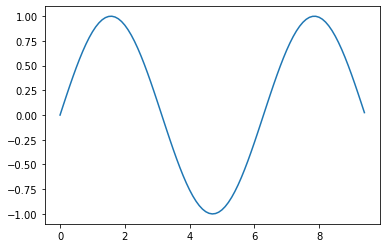

In [84]:
# Berechne die x und y Koordinaten fur Punkte auf einer Sinuskurve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Stelle die Punkte mit matplotlib dar
plt.plot(x, y)

plt.show()

Mit nur wenig Mehraufwand können wir mehrere Kurven darstellen und Graphbeschreibungen hinzufügen:

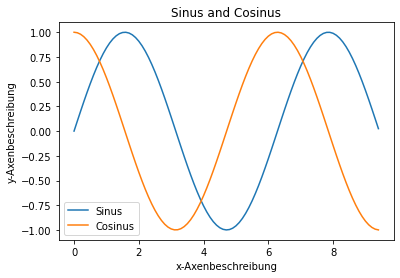

In [85]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Stelle die Punkte mit matplotlib dar
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x-Axenbeschreibung')
plt.ylabel('y-Axenbeschreibung')
plt.title('Sinus and Cosinus') # Titel der Grafik
plt.legend(['Sinus', 'Cosinus']) # Legende der Kurven

plt.show()

###Subplots 

Mit der `subplot`-Funktion kann man mehrere verschiedene Sachen in die gleichen Grafik darstellen:

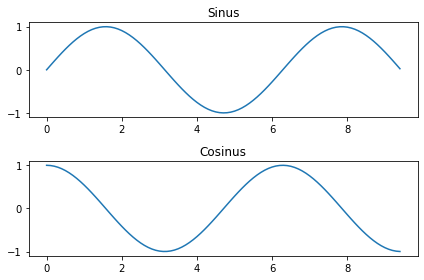

In [86]:
# Berechne die x und y Koordinaten fur Punkte auf einer Sinus- und Cosinuskurve
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Erstelle ein Raster mit subplots mit Hoehe 2 und Breite 1 und aktiviere den
# ersten subplot.
plt.subplot(2, 1, 1)

# Zeichne den ersten Plot
plt.plot(x, y_sin)
plt.title('Sinus')

# Aktiviere den zweiten Plot und zeichne den zweiten Plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosinus')

# Passe das Layout an damit die Title nicht mit den Axenbeschriftungen ueberlappen
plt.tight_layout()
# Zeige die Grafik
plt.show()

Auch zur `subplot`-Funktion gibt es mehr Infos in der [Dokumentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).